# Computing Saliency of videos

In [1]:
from ast import literal_eval
import cv2
import os
import pandas as pd
# Display Video in juptyer notebook
from IPython.display import HTML
from base64 import b64encode

# Plot saliency sum
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('/mnt/rufus_A/Memento10k/memento_train_frames.csv')
data.head()

,frame_path,filename,url,mem_score,alpha,audio_description,captions,action_labels
0,adult-female-singing_peeks-www_k_to_keek_2Qwue...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
1,adult-female-singing_peeks-www_k_to_keek_2Qwue...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
2,adult-female-singing_peeks-www_k_to_keek_2Qwue...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
3,adult-female-singing_peeks-www_k_to_keek_2Qwue...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
4,adult-female-singing_peeks-www_k_to_keek_2Qwue...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."


In [3]:
data["frame_path"] = data["frame_path"].apply(
    lambda x: os.path.join("/mnt/rufus_A/Memento10k/videos", x)
)

In [4]:
data["filename"] = data["filename"].apply(
    lambda x: os.path.join("/mnt/rufus_A/Memento10k/videos", x)
)

In [5]:
data.head()

,frame_path,filename,url,mem_score,alpha,audio_description,captions,action_labels
0,/mnt/rufus_A/Memento10k/videos/adult-female-si...,/mnt/rufus_A/Memento10k/videos/adult-female-si...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
1,/mnt/rufus_A/Memento10k/videos/adult-female-si...,/mnt/rufus_A/Memento10k/videos/adult-female-si...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
2,/mnt/rufus_A/Memento10k/videos/adult-female-si...,/mnt/rufus_A/Memento10k/videos/adult-female-si...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
3,/mnt/rufus_A/Memento10k/videos/adult-female-si...,/mnt/rufus_A/Memento10k/videos/adult-female-si...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."
4,/mnt/rufus_A/Memento10k/videos/adult-female-si...,/mnt/rufus_A/Memento10k/videos/adult-female-si...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',..."


In [6]:
path = data.sample(1)["frame_path"].values[0]
print(path)
img = cv2.imread(path)

/mnt/rufus_A/Memento10k/videos/walking_flickr-4-8-8-2-2-5-8-9-20048822589_119/frames/frame023.png


In [12]:
data[data["frame_path"] == path]

,frame_path,filename,url,mem_score,alpha,audio_description,captions,action_labels
584605,/mnt/rufus_A/Memento10k/videos/walking_flickr-...,walking_flickr-4-8-8-2-2-5-8-9-20048822589_119...,https://data.csail.mit.edu/soundnet/actions3/w...,0.842718,-0.000941,there are some people walk in your ways or wha...,['A man and woman walking on a grassy trail wi...,['walking']


In [13]:
img.shape

(256, 456, 3)

In [8]:
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread

In [14]:
# Compute saliency
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(success, saliency_map) = saliency.computeSaliency(gray)
# show the images
cv2.imshow("Image", img)
cv2.imshow("Output", saliency_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread (0x216bdf0).
Cannot move to target thread (0x1eaeaf0)

QObject::moveToThread: Current thread (0x1eaeaf0) is not the object's thread

In [15]:
print(saliency_map.shape[0] * saliency_map.shape[1])

116736


In [16]:
# Scale saliency map to 0-1
saliency_map.sum()

23101.59

In [24]:
# Choose a random video and display it
video_path = data.sample(1)["filename"].values[0]
print(video_path)
video = cv2.VideoCapture(video_path)

# Get video properties
fps = video.get(cv2.CAP_PROP_FPS)
frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count / fps
print(fps, frame_count, duration)

# Display video
HTML("""
<video width="320" height="240" controls>
  <source src="data:video/mp4;base64,{0}" type="video/mp4">
</video>
""".format(b64encode(open(video_path, "rb").read()).decode()))

/mnt/rufus_A/Memento10k/videos/swimming_flickr-7-4-4-3-8-8-8-7-2474438887_6.mp4
29.97002997002997 91.0 3.036366666666667


--- 0.0491032600402832 seconds ---


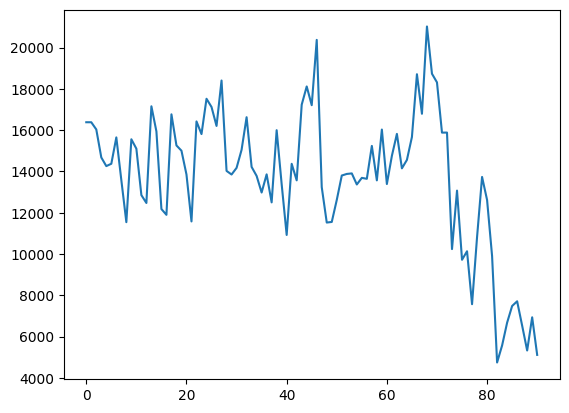

In [33]:
# Compute saliency for each frame and store the saliency sum
# Time it
import time
start_time = time.time()

# Restart video if needed
video.set(cv2.CAP_PROP_POS_FRAMES, 0)

saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
saliency_sum = []
while True:
    ret, frame = video.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    (success, saliency_map) = saliency.computeSaliency(gray)
    saliency_sum.append(saliency_map.sum())

print("--- %s seconds ---" % (time.time() - start_time))

plt.plot(saliency_sum)
plt.show()

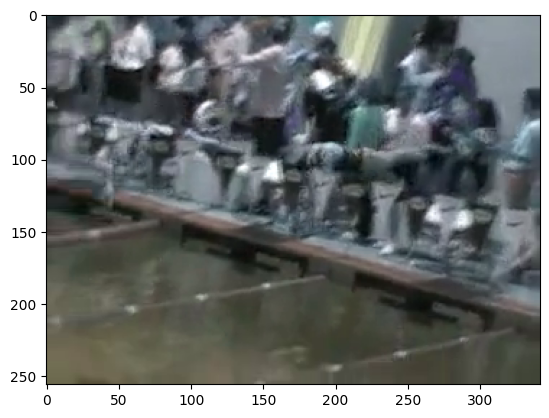

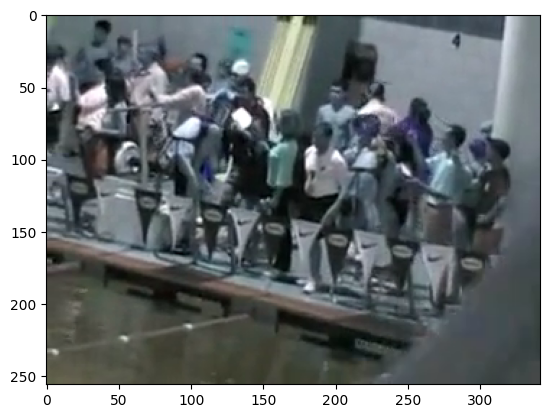

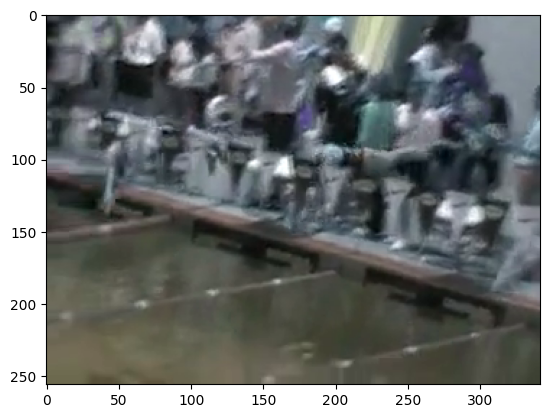

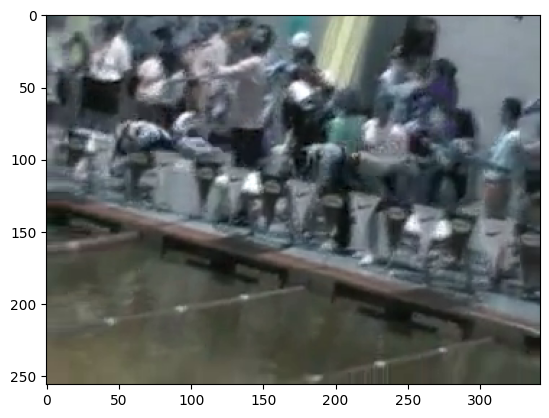

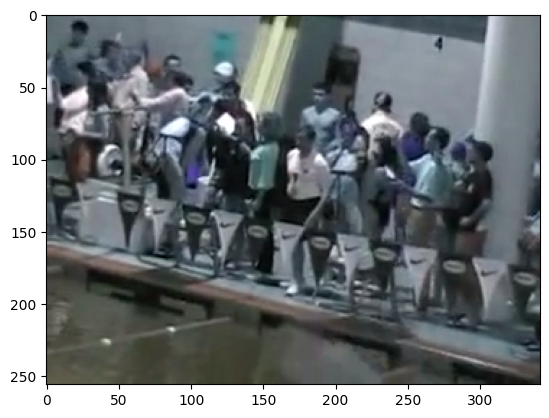

In [34]:
# Display the frames with the highest saliency
# Sort saliency sum
saliency_sum_sorted = sorted(saliency_sum, reverse=True)
# Get the 5 frames with the highest saliency
most_salient = saliency_sum_sorted[:5]
# Get the index of the frames
most_salient_idx = [saliency_sum.index(s) for s in most_salient]
# Get the frames
video.set(cv2.CAP_PROP_POS_FRAMES, 0)
frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break
    frames.append(frame)

# Display the frames
for idx in most_salient_idx:
    plt.imshow(frames[idx])
    plt.show()

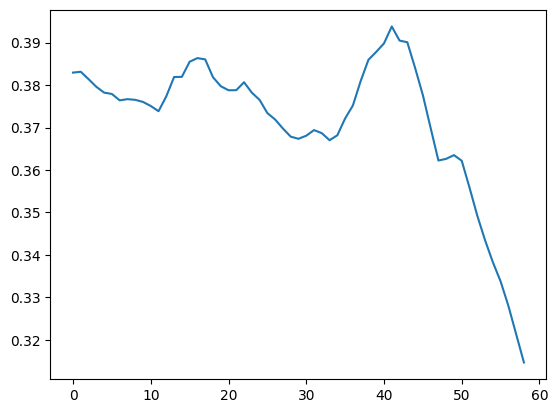

In [35]:
# Normalize saliency sum to sum 1
saliency_sum_norm = [s / sum(saliency_sum) for s in saliency_sum]

# Select the 32 frame window with highest saliency cumsum
window_saliency = []
for i in range(len(saliency_sum_norm) - 32):
    window_saliency.append(sum(saliency_sum_norm[i:i+32]))

# Plot window saliency
plt.plot(window_saliency)
plt.show()

In [45]:
video

< cv2.VideoCapture 0x7ffb735154f0>

In [48]:
# Display the window with highest saliency
most_salient_window = max(window_saliency)
most_salient_window_idx = window_saliency.index(most_salient_window)
print(most_salient_window_idx)

# Display just most salient window of video
video.set(cv2.CAP_PROP_POS_FRAMES, most_salient_window_idx)

idx = most_salient_window_idx
suc, frame = video.read()
l = most_salient_window_idx + 32
while suc and idx < l:
    plt.imshow(frame)
    plt.show()
    suc, frame = video.read()
    idx += 1

41


In [27]:
# Load data with computed saliency
data_saliency = pd.read_csv("/mnt/rufus_A/multimemo/data/processed/memento_train_test_frames_saliency.csv")
# Sort by filename and the frame number
data_saliency = data_saliency.sort_values(["filename", "frame_path"])
data_saliency.head()

,frame_path,filename,url,mem_score,alpha,audio_description,captions,action_labels,frame_path_saliency_path,frame_path_saliency
28,/mnt/rufus_A/Memento10k/videos/adult-female-si...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',...",/mnt/rufus_A/multimemo/features/memento_train_...,68074.36
9,/mnt/rufus_A/Memento10k/videos/adult-female-si...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',...",/mnt/rufus_A/multimemo/features/memento_train_...,66735.42
6,/mnt/rufus_A/Memento10k/videos/adult-female-si...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',...",/mnt/rufus_A/multimemo/features/memento_train_...,65820.16
65,/mnt/rufus_A/Memento10k/videos/adult-female-si...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',...",/mnt/rufus_A/multimemo/features/memento_train_...,65838.28
35,/mnt/rufus_A/Memento10k/videos/adult-female-si...,adult-female-singing_peeks-www_k_to_keek_2Qwue...,https://data.csail.mit.edu/soundnet/actions3/a...,0.989151,-0.000387,indoors you see a woman with red hair held up ...,['A brown hair girl with lip piercings mumbles...,"['holding', 'looking', 'adult+female+singing',...",/mnt/rufus_A/multimemo/features/memento_train_...,65916.57


In [28]:
data_saliency.describe()

,mem_score,alpha,frame_path_saliency
count,732548.000000,732548.000000,732548.000000
mean,0.800922,-0.001645,29705.175011
std,0.105293,0.001111,21568.911044
min,0.383271,-0.006526,0.000000
25%,0.732212,-0.002384,17736.493500
50%,0.812688,-0.001565,22442.469000
75%,0.880421,-0.000842,32548.733500
max,1.000000,0.002955,346426.840000


In [29]:
# Show videos for which saliency is 0 for all frames (ther is no saliency_sum column in the dataframe)
data_saliency[data_saliency["frame_path_saliency"] == 0].groupby("filename").count()

,frame_path,url,mem_score,alpha,audio_description,captions,action_labels,frame_path_saliency_path,frame_path_saliency
filename,,,,,,,,,
bicycling_kwwccfoBoA4_103.mp4,1,1,1,1,1,1,1,1,1
celebrating_7_80k9hYBpc_194.mp4,1,1,1,1,1,1,1,1,1
cheering_flickr-0-9-9-7-9-1-6-3-2909979163_12.mp4,5,5,5,5,5,5,5,5,5
climbing_flickr-9-1-7-8-4-5-5-4-2691784554_37.mp4,10,10,10,10,10,10,10,10,10
singing_2lpSYc25O7s_35.mp4,1,1,1,1,1,1,1,1,1
singing_flickr-0-7-8-8-9-0-2-3-3207889023_11.mp4,14,14,14,14,14,14,14,14,14
singing_flickr-5-2-8-5-4-6-7-3-11552854673_35.mp4,9,9,9,9,9,9,9,9,9
sitting_3-7-2-8-9-2-7-7-5437289277.mp4,1,1,1,1,1,1,1,1,1
snowing_flickr-6-1-9-5-3-1-2-5-2761953125_21.mp4,3,3,3,3,3,3,3,3,3


In [30]:
data_saliency[data_saliency["filename"] == "talking_flickr-6-2-3-7-0-8-8-7-5762370887_64.mp4"]["frame_path_saliency"].describe()

count       91.000000
mean     14089.449209
std       8766.792222
min          0.000000
25%          0.000000
50%      18855.730000
75%      19478.086000
max      22401.166000
Name: frame_path_saliency, dtype: float64

In [31]:
# Display the video with more 0 saliency frames
video_path = data_saliency[data_saliency["filename"] == "talking_flickr-6-2-3-7-0-8-8-7-5762370887_64.mp4"]["filename"].values[0]
video_path_full = os.path.join("/mnt/rufus_A/Memento10k/videos", video_path)
print(video_path)
# Show frames from this video
data_saliency[data_saliency["filename"] == video_path][["frame_path_saliency", "frame_path"]]
# Display video
HTML("""
<video width="320" height="240" controls>
  <source src="data:video/mp4;base64,{0}" type="video/mp4">
</video>
""".format(b64encode(open(video_path_full, "rb").read()).decode()))

talking_flickr-6-2-3-7-0-8-8-7-5762370887_64.mp4


In [34]:
data_saliency[data_saliency["filename"] == video_path]["frame_path_saliency"]

721516    20703.816
721497    20796.895
721494    21488.838
721553    21976.080
721523    22066.717
            ...    
721506        0.000
721564        0.000
721507        0.000
721565        0.000
721491        0.000
Name: frame_path_saliency, Length: 91, dtype: float64

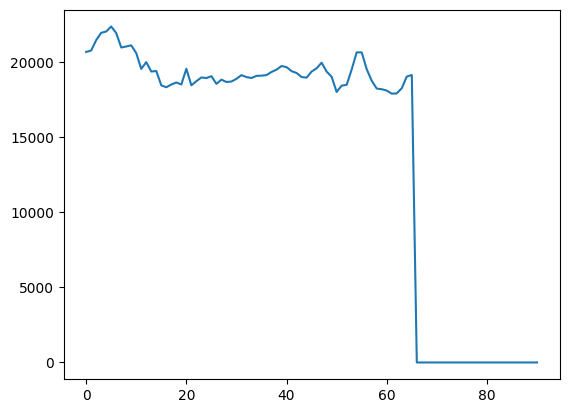

In [35]:
# Display saliency plot for this video
x = data_saliency[data_saliency["filename"] == video_path]["frame_path_saliency"].values
plt.plot(x)

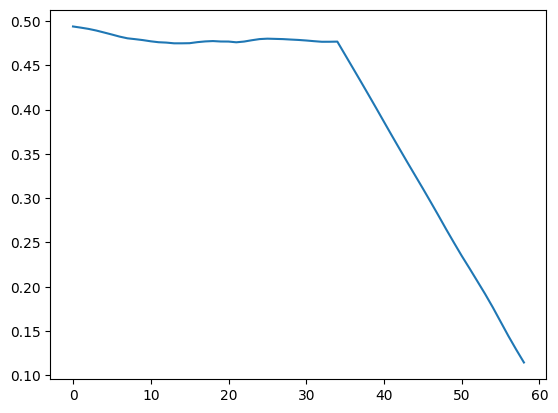

In [36]:
# Normalize saliency sum to sum 1
saliency_sum = data_saliency[data_saliency["filename"] == video_path]["frame_path_saliency"].values
saliency_sum_norm = [s / sum(saliency_sum) for s in saliency_sum]

# Select the 32 frame window with highest saliency cumsum
window_saliency = []
for i in range(len(saliency_sum_norm) - 32):
    window_saliency.append(sum(saliency_sum_norm[i:i+32]))

# Plot window saliency
plt.plot(window_saliency)
plt.show()

In [37]:
# Check if the dataframe sorted by filename and then frame_path
data_saliency[data_saliency["filename"] == video_path]["frame_path"].values

array(['/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame001.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame002.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame003.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame004.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame005.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame006.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame007.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame008.png',
       '/mnt/rufus_A/Memento10k/videos/talking_flickr-6-2-3-7-0-8-8-7-5762370887_64/frames/frame009.png',
       '/mnt/rufus_A/Memento10k/videos/talking

In [42]:
saliency_scores = data_saliency.groupby('filename').frame_path_saliency.apply(list)
saliency_scores = saliency_scores.apply(lambda x: [float(s) for s in x])
saliency_scores["filename"] = saliency_scores.index
# Reset index
# saliency_scores.reset_index(drop=True, inplace=True)
saliency_scores.head()
# saliency_scores["filename"] = saliency_scores["filename"].apply(lambda x: video_path + x)
# Drop all columns but the saliency scores
# saliency_scores = saliency_scores[["filename","frame_path_saliency"]]
# saliency_scores.head()

filename
adult-female-singing_peeks-www_k_to_keek_2Qwueab_25.mp4    [68074.36, 66735.42, 65820.16, 65838.28, 65916...
adult-female-singing_peeks-www_k_to_keek_2Xyqeab_3.mp4     [22422.12, 22423.686, 22424.416, 22129.88, 224...
adult-female-singing_peeks-www_k_to_keek_2g4teab_28.mp4    [33777.285, 33782.586, 34499.613, 34961.38, 35...
adult-female-singing_peeks-www_k_to_keek_EO30eab_19.mp4    [16196.69, 16200.574, 16307.975, 16320.641, 16...
adult-female-singing_peeks-www_k_to_keek_J2Rveab_1.mp4     [26505.305, 26510.486, 26308.379, 26307.988, 2...
Name: frame_path_saliency, dtype: object

In [45]:
# Acess the saliency scores list for a video from the saliency scores pandas series
saliency_scores[video_path]

[20703.816,
 20796.895,
 21488.838,
 21976.08,
 22066.717,
 22401.166,
 21963.918,
 21001.615,
 21067.87,
 21143.3,
 20625.586,
 19574.162,
 20023.904,
 19398.365,
 19432.322,
 18473.625,
 18348.535,
 18535.133,
 18666.906,
 18533.54,
 19582.21,
 18478.885,
 18752.58,
 19002.236,
 18962.336,
 19085.854,
 18576.066,
 18855.73,
 18702.37,
 18730.033,
 18911.33,
 19157.84,
 19027.523,
 18965.4,
 19109.707,
 19122.822,
 19161.865,
 19369.656,
 19523.85,
 19763.977,
 19689.5,
 19425.143,
 19300.693,
 19029.508,
 18991.117,
 19395.934,
 19611.84,
 19988.535,
 19394.633,
 19048.467,
 18036.174,
 18456.715,
 18511.885,
 19531.893,
 20676.783,
 20671.555,
 19554.422,
 18779.152,
 18262.334,
 18216.9,
 18126.031,
 17920.365,
 17940.234,
 18285.648,
 19064.04,
 19165.814,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]